<h1>Assignments for "Data Exploration - Multivariate Analysis"</h1>

In this assignment, you will work on the Students Performance (dataset). You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

<b>(1)</b> Does the performance in the exams vary according to gender, origin and education level of parents?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

notes = pd.read_csv("StudentsPerformance.csv")
notes.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


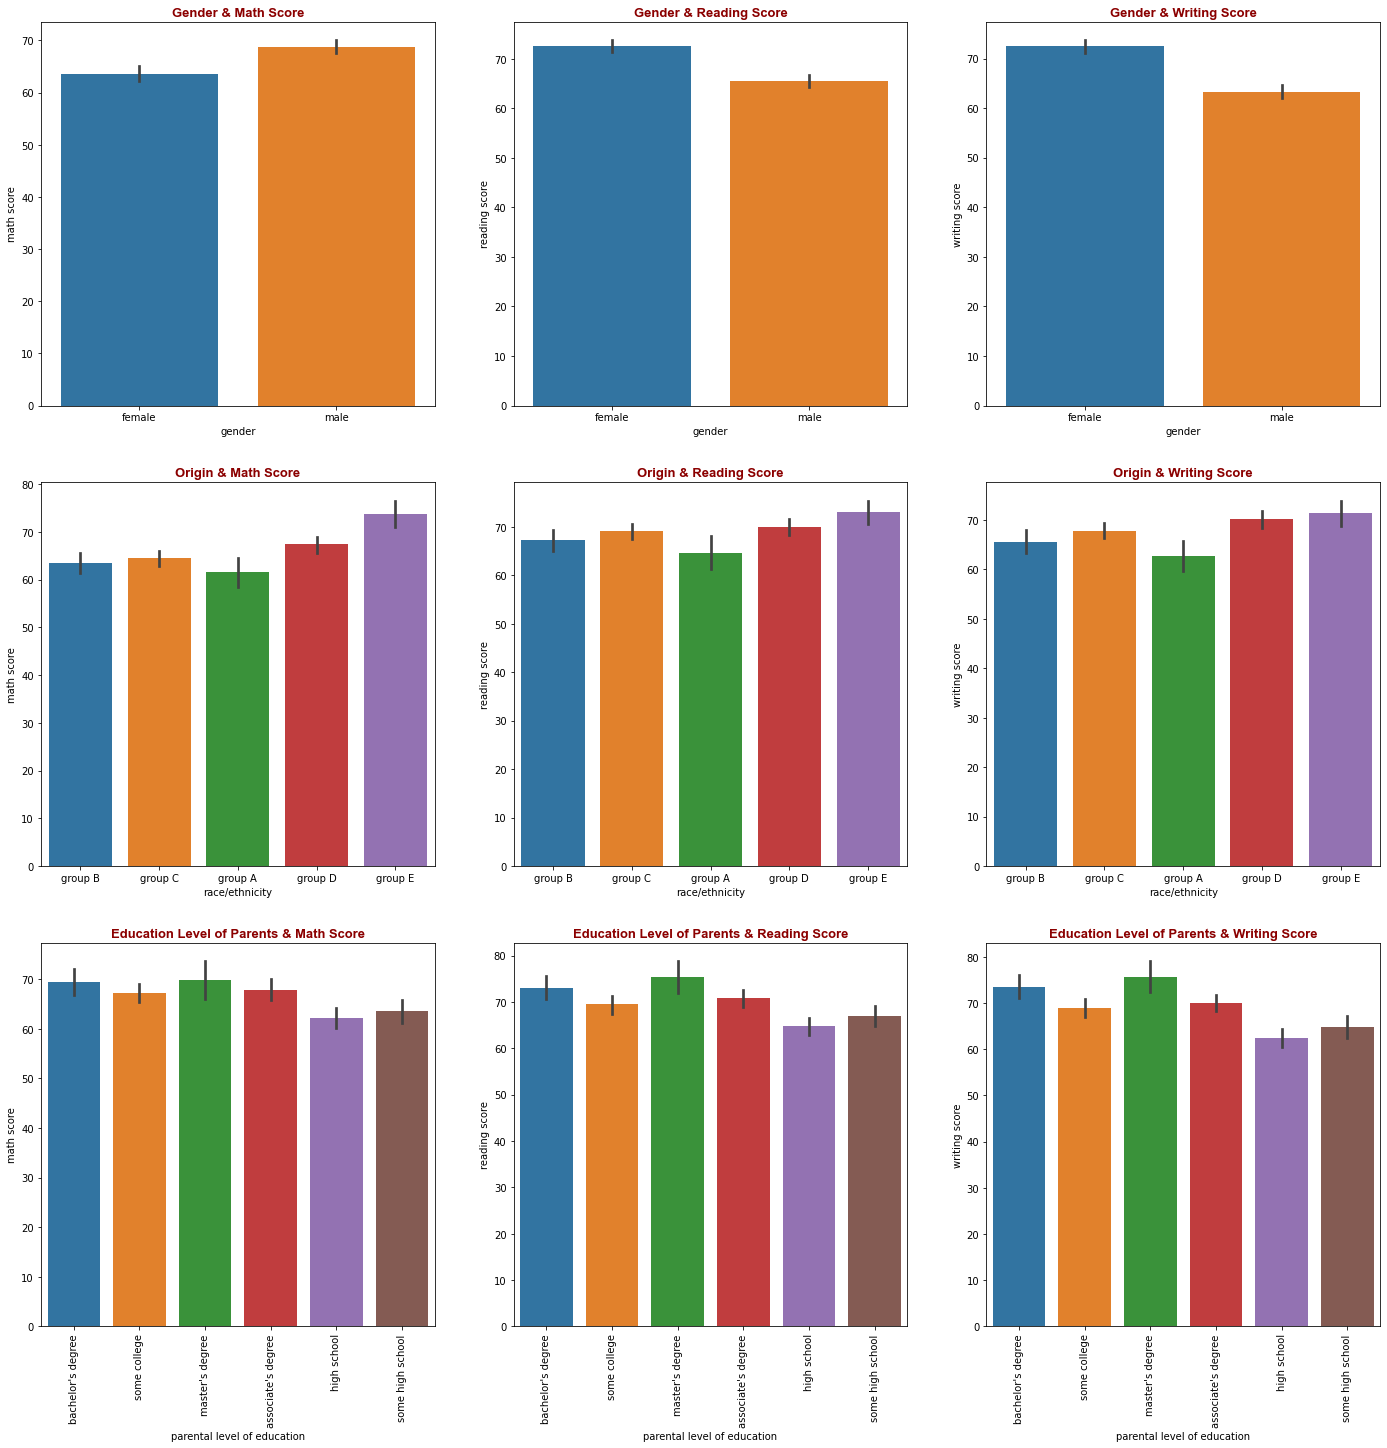

In [2]:
plt.figure(figsize=(24, 24))

plt.subplot(331)
sns.barplot(x='gender', y='math score', data=notes)
plt.title('Gender & Math Score', fontdict=title_font)

plt.subplot(332)
sns.barplot(x='gender', y='reading score', data=notes)
plt.title('Gender & Reading Score', fontdict=title_font)

plt.subplot(333)
sns.barplot(x='gender', y='writing score', data=notes)
plt.title('Gender & Writing Score', fontdict=title_font)

plt.subplot(334)
sns.barplot(x='race/ethnicity', y='math score', data=notes)
plt.title('Origin & Math Score', fontdict=title_font)

plt.subplot(335)
sns.barplot(x='race/ethnicity', y='reading score', data=notes)
plt.title('Origin & Reading Score', fontdict=title_font)

plt.subplot(336)
sns.barplot(x='race/ethnicity', y='writing score', data=notes)
plt.title('Origin & Writing Score', fontdict=title_font)

plt.subplot(337)
sns.barplot(x='parental level of education', y='math score', data=notes)
plt.title('Education Level of Parents & Math Score', fontdict=title_font)
plt.xticks(rotation=90)

plt.subplot(338)
sns.barplot(x='parental level of education', y='reading score', data=notes)
plt.title('Education Level of Parents & Reading Score', fontdict=title_font)
plt.xticks(rotation=90)

plt.subplot(339)
sns.barplot(x='parental level of education', y='writing score', data=notes)
plt.title('Education Level of Parents & Writing Score', fontdict=title_font)
plt.xticks(rotation=90)

plt.show()

Since scores are continuous variables and gender, race/ethnicity and education level of parents are categorical variables, we use bar plot.<br>
-When we look at the plot we can say reading and writing score females are better than males.<br>
-For origins almost all scores types group E has a superiority.<br>
-Finally parental level of education and scores graphics show us that children who have parents with master's degree are more successful in reading and writing.

<b>(2)</b> Does lunch type have a relationship with exam performances? How can you explain this, if any?

In [3]:
notes.lunch.head()

0        standard
1        standard
2        standard
3    free/reduced
4        standard
Name: lunch, dtype: object

In [4]:
notes.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [5]:
notes.groupby("lunch")[["math score", "reading score", "writing score"]].mean().T

lunch,free/reduced,standard
math score,58.921127,70.034109
reading score,64.653521,71.654264
writing score,63.022535,70.823256


Scores are continuous variables and lunch is a catorical variable, so we use again bar plot.

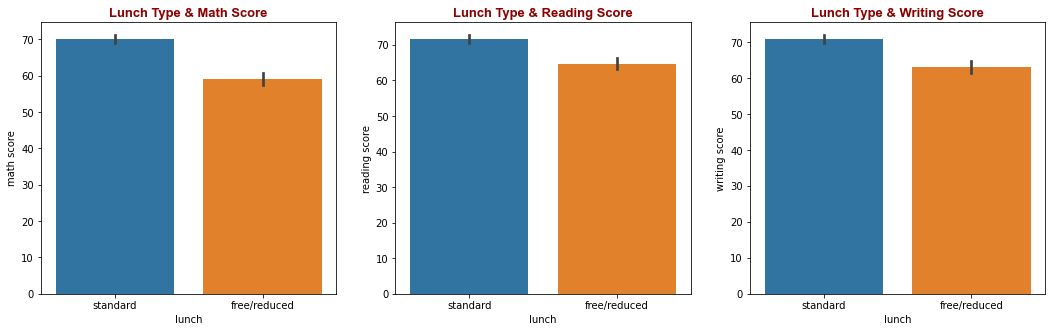

In [6]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.barplot(x='lunch', y='math score', data=notes)
plt.title('Lunch Type & Math Score', fontdict=title_font)

plt.subplot(132)
sns.barplot(x='lunch', y='reading score', data=notes)
plt.title('Lunch Type & Reading Score', fontdict=title_font)

plt.subplot(133)
sns.barplot(x='lunch', y='writing score', data=notes)
plt.title('Lunch Type & Writing Score', fontdict=title_font)

plt.show()

By looking and analyzing these plots we can say that students who have standard lunch type are more successful. 

<b>(3)</b> Does the preparation courses have an impact on exam performance?

In [7]:
notes["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [8]:
notes.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


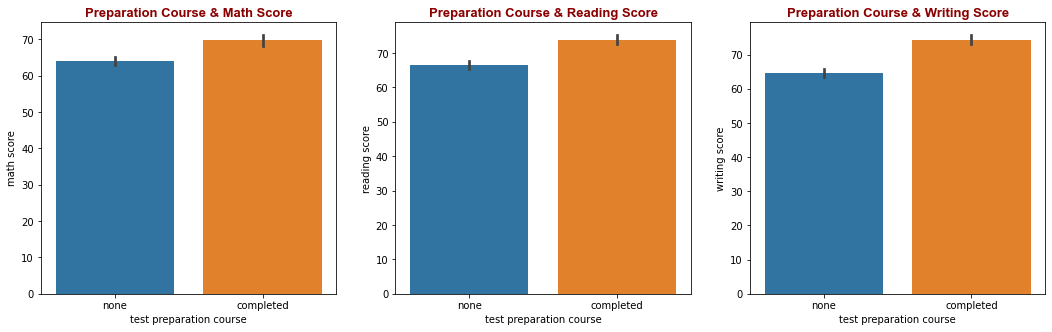

In [9]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.barplot(x='test preparation course', y='math score', data=notes)
plt.title('Preparation Course & Math Score', fontdict=title_font)

plt.subplot(132)
sns.barplot(x='test preparation course', y='reading score', data=notes)
plt.title('Preparation Course & Reading Score', fontdict=title_font)

plt.subplot(133)
sns.barplot(x='test preparation course', y='writing score', data=notes)
plt.title('Preparation Course & Writing Score', fontdict=title_font)

plt.show()

Scores are continuous variables and test preparation course is a catorical variable, so we use again bar plot.<br>
-We can obviously say that students attending an test preparation course are more successful in three scores.

<b>(4)</b> Which lessons are most correlated with each other?

In [10]:
corr = notes.corr()
display(corr)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


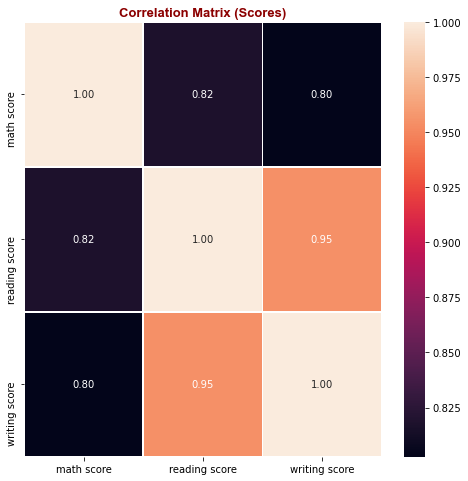

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5)
plt.title("Correlation Matrix (Scores)", fontdict=title_font)

plt.show()

Since we study in continuous variables we use the correlation coefficient and matrix. Writing score and reading score have high correlation to each other.